## The following EDA contains: 

- Wordclouds
- Frequency distributions


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [75]:
df = pd.read_csv('../data_processed/concatenated_data_cleaned_labeled_preprocessed_alt.csv') 

### Frequency of Job Posting by Label

In [76]:
by_role = df.groupby('bin_role')
by_city = df.groupby('location')

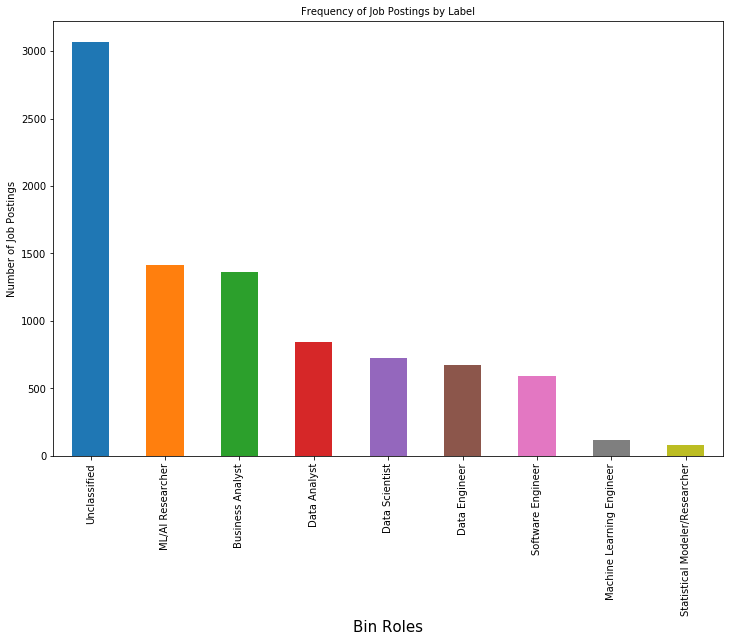

In [77]:
plt.figure(figsize=(12,8))
by_role.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Bin Roles", fontsize=15)
plt.ylabel("Number of Job Postings",fontsize=10)
plt.title("Frequency of Job Postings by Label", fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [78]:
by_role.size().sort_values(ascending=False)

bin_role
Unclassified                      3070
ML/AI Researcher                  1414
Business Analyst                  1366
Data Analyst                       846
Data Scientist                     722
Data Engineer                      672
Software Engineer                  592
Machine Learning Engineer          116
Statistical Modeler/Researcher      82
dtype: int64

## WordClouds by Labels (binned roles) 

In [79]:
# List of stopwords to upload
en_stop = set(nltk.corpus.stopwords.words('english'))

In [80]:
def group_descriptions(by_role):
    '''Creates concatenated/joined text for job descriptions for each search role'''
    roles = []
    merged_desc = []
    for key, items in by_role.indices.items():
        # concatenate strings in descriptions column (by search_role grouping) and append to list of merged descriptions
        string=(" ").join(description for description in df.loc[items,'new_description'])
        merged_desc.append(string)
        roles.append(key)

    return merged_desc, roles

In [81]:
descriptions, roles = group_descriptions(by_role)

In [82]:
def create_wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords = en_stop, background_color='white').generate(text)

    # Display the generated image:
    plt.figure( figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    
    plt.axis("off")
    plt.show()

Bin Role:  Business Analyst


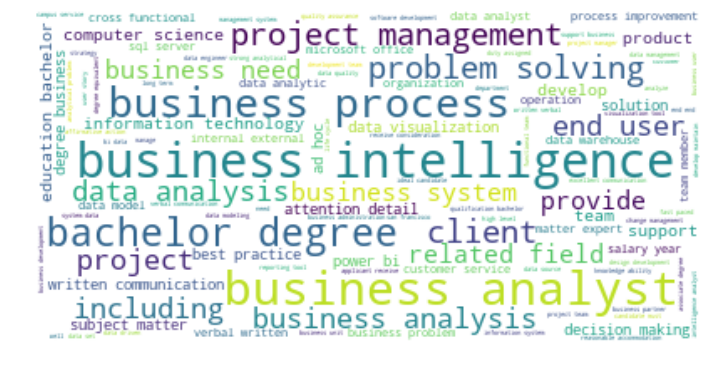

Bin Role:  Data Analyst


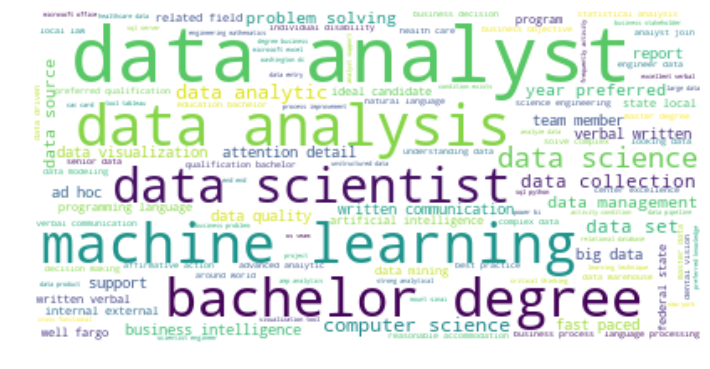

Bin Role:  Data Engineer


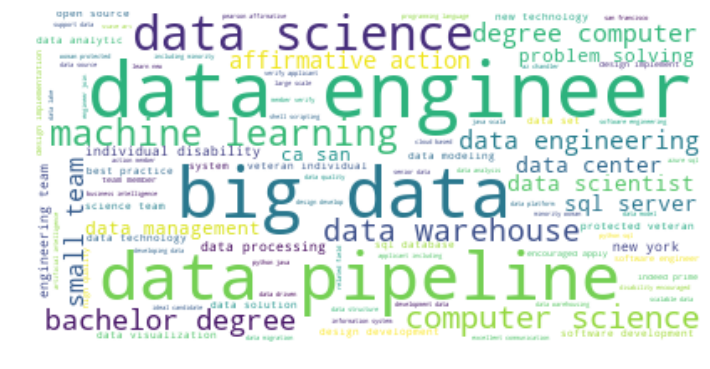

Bin Role:  Data Scientist


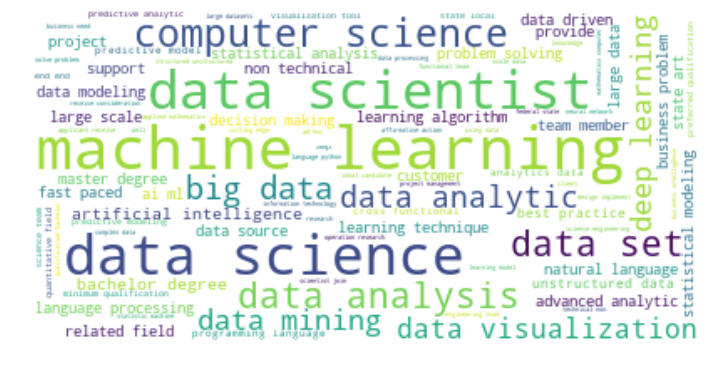

Bin Role:  ML/AI Researcher


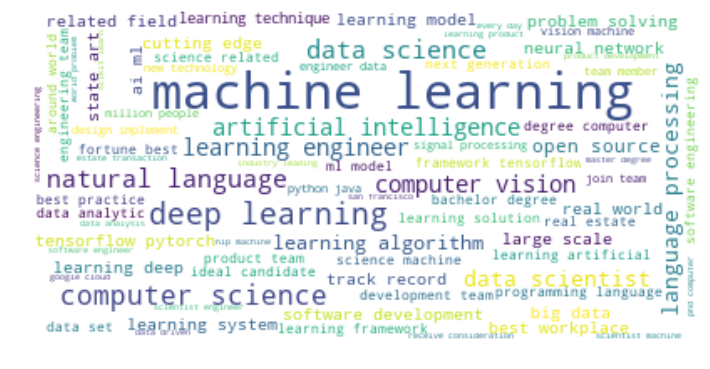

Bin Role:  Machine Learning Engineer


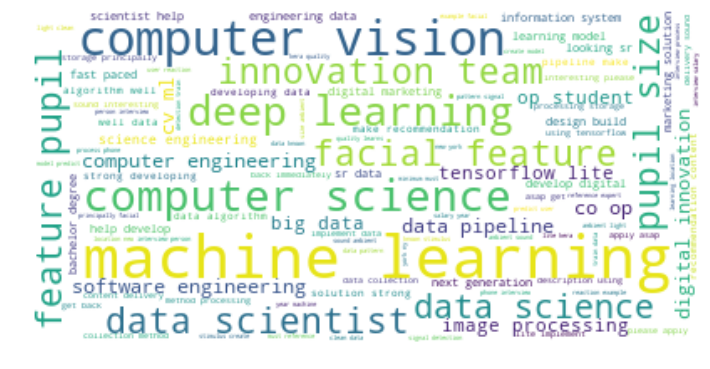

Bin Role:  Software Engineer


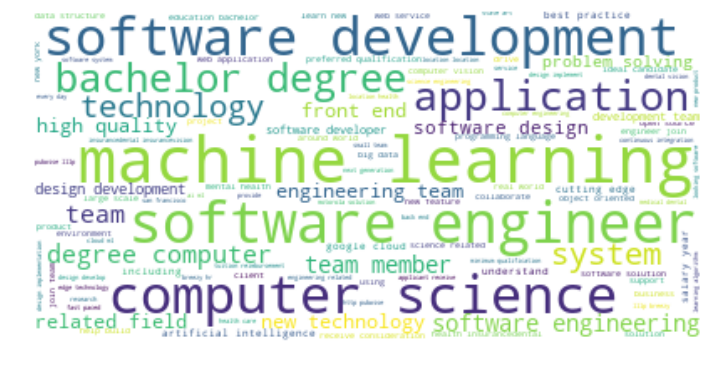

Bin Role:  Statistical Modeler/Researcher


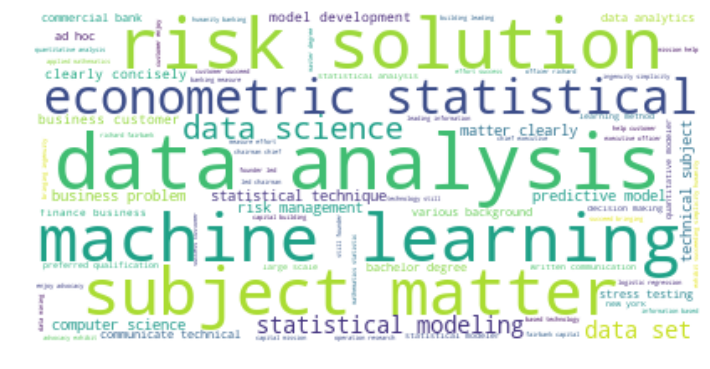

Bin Role:  Unclassified


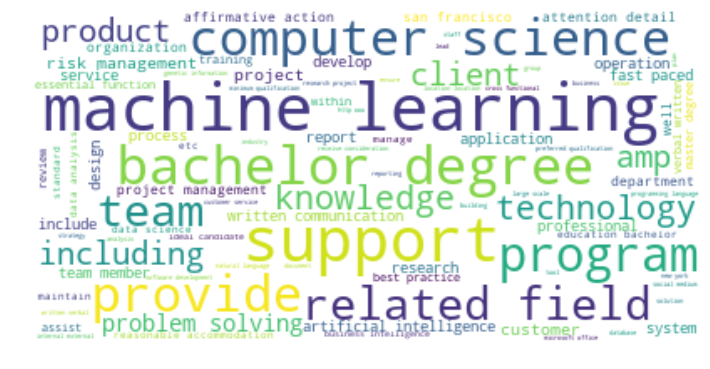

In [83]:
# New wordclouds using bin_role column
for i, merged_text in enumerate(descriptions):
    print('Bin Role: ', roles[i])
    create_wordcloud(merged_text)

## Frequency Distributions of Words

### Frequency Distribution and Graphing

#### NOTE: Doesn't work because concatenated descriptions string is too big! :( 

In [29]:
# Preprocessing grouped (by search role) 

grouped_tokens = []

for i, merged_text in enumerate(descriptions):
    print('Search Role: ', roles[i])
    tokens = tokenize(merged_text)
    # Filters tokens to only words of length 4 or more
    tokens = [token for token in tokens if len(token) > 4]
    # Filters tokens that are in list of stopwords
    tokens = [token for token in tokens if token not in en_stop]
    # Lemmatizes tokens to their roots
    tokens = [get_lemma(token) for token in tokens]
    grouped_tokens.append(tokens)
    
    fdist = FreqDist(tokens)
    print(fdist.most_common(5))
    
    fdist.plot(30,cumulative=False )
    plt.figure(figsize=(50, 20))  # the size you want

    plt.show()
    print()

Search Role:  Business Analyst


ValueError: [E088] Text of length 4901189 exceeds maximum of 1000000. The v2.x parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.